<a href="https://colab.research.google.com/github/AnshMittal1811/BasicCVprogs/blob/master/DisplayingNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=980e1295a3a2c882e4f56ea2249757487d7acf45985bef32958e8a96909e87ee
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [3]:
cd 'drive/My Drive/Data/DisplayNumbers'

/content/drive/My Drive/Data/DisplayNumbers
time: 4.12 ms


In [4]:
ls

Img1.png  Img2.png
time: 4.09 s


Requirements: 
1) Identify the text and numbers written in these two images.
2) Draw a box around the text being read, identify and print the text.
3) Given that the image quality is blur, use appropriate image preprocessing techniques to enhance the readibility of text.


In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imutils
from scipy import ndimage

time: 509 ms


In [6]:
import glob
images = glob.glob('*.png')

time: 1.76 ms


In [7]:
images

['Img2.png', 'Img1.png']

time: 7.72 ms


# Using PyTesseract Directly on both the images

In [8]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,385 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [9]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image


time: 8.88 ms


Img2.png
pc210Lcl
a2 13077189

are
o 561002

ey

suiah £0282

cenoue orn uf
Pi

—
4

9k
Se


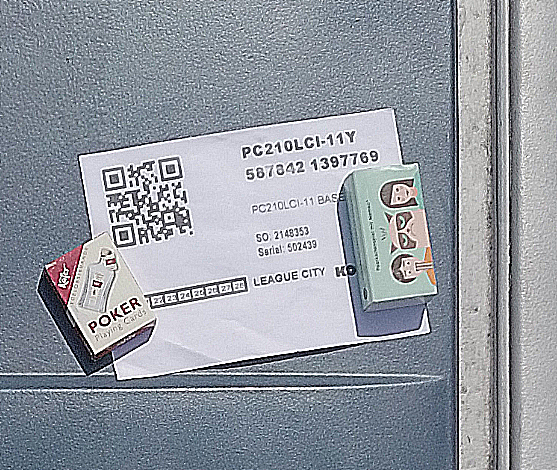

--------------------
Img1.png
== I IM s*s** 28853 %
E


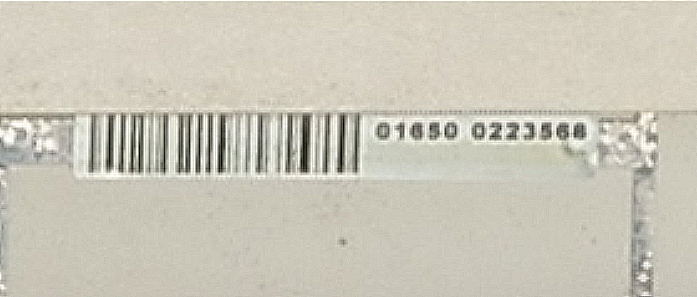

--------------------
time: 3.45 s


In [10]:
for i in range(len(images)):
    img = cv.imread(images[i])
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    blur = cv.GaussianBlur(img,(5,5),0)
    img = cv.filter2D(img, -1, kernel)
    if images[i] == 'Img2.png': 
      img1  = img
      img = cv.rotate(img1, cv.ROTATE_90_COUNTERCLOCKWISE)

    else:
      img2 = img
      
    print(images[i])
    extractedInformation = pytesseract.image_to_string(img)
    print(extractedInformation)
    cv2_imshow(img)
    print('-'*20)

As we can observe, PyTesseract fails to detect the numbers and text that has been given. So, we try different approach. 

# Task #1: Improve the readability of the text


Img2.png


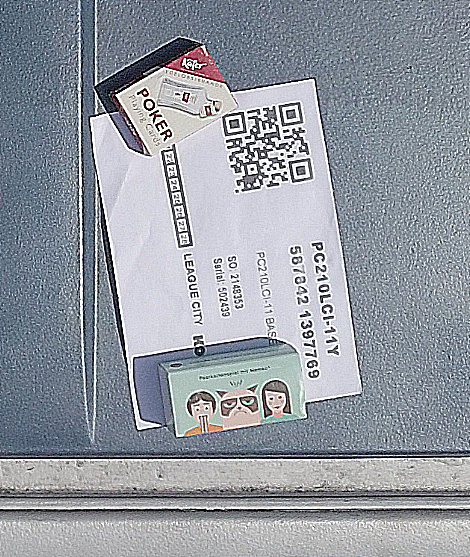

--------------------
Img1.png


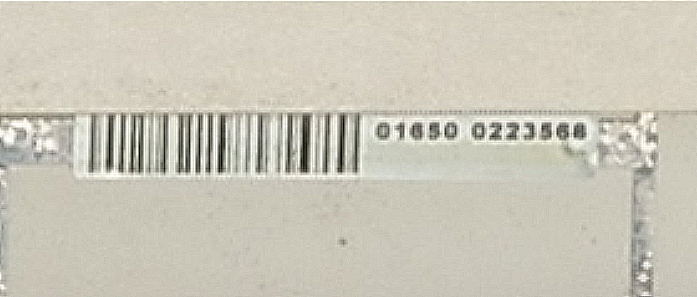

--------------------
time: 240 ms


In [30]:
for i in range(len(images)):
  img = cv.imread(images[i])
  kernel = np.array([[-1,-1,-1], 
                      [-1,9,-1], 
                      [-1,-1,-1]])
  blur = cv.GaussianBlur(img,(5,5),0)
  img = cv.filter2D(img, -1, kernel)
  
  # img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  # img = cv.threshold(img, 128, 255, cv.THRESH_OTSU | cv.THRESH_BINARY)[1]

  if images[i] == 'Img2.png': 
    img1  = img
  else:
    img2 = img
  print(images[i])
  cv2_imshow(img)
  print('-'*20)

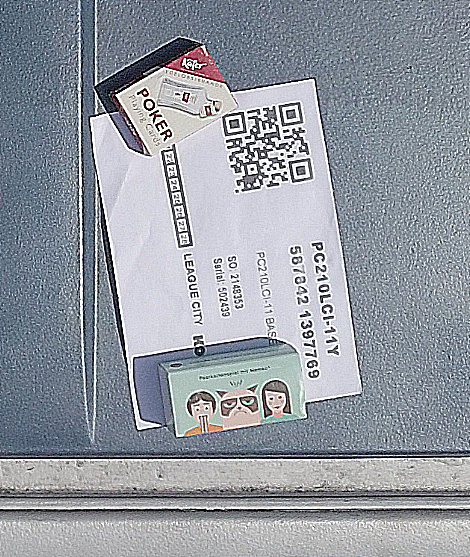

time: 95.1 ms


In [31]:
cv2_imshow(img1)

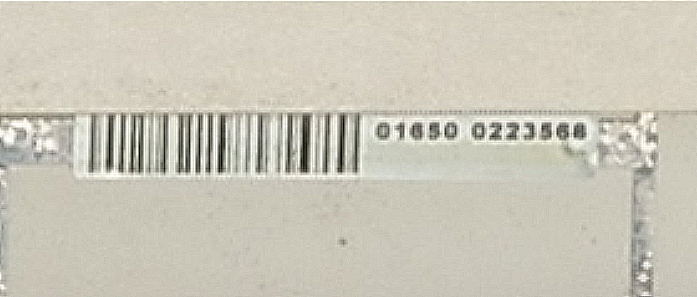

time: 80.3 ms


In [32]:
cv2_imshow(img2)

# Creating ROI (Region Of Interest) for the text to be read




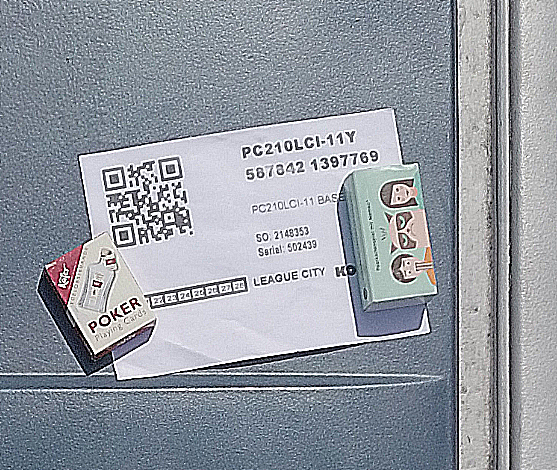

--------------------


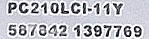

--------------------


--------------------


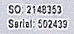

--------------------


--------------------


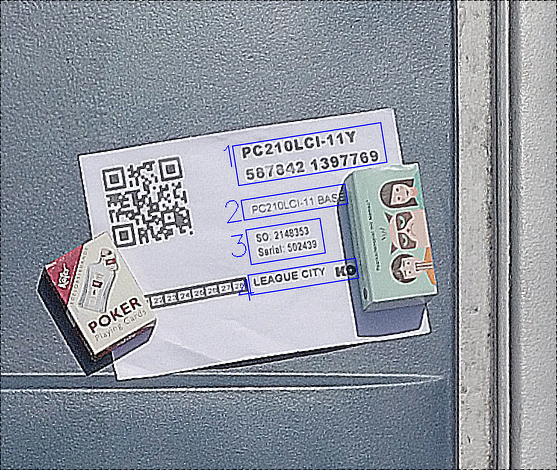

time: 706 ms


In [41]:
img1_r = cv.rotate(img1, cv.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(img1_r)
print('-'*20)
#rotation angle in degree
rotated = ndimage.rotate(img1_r, -9)


cv.rectangle(rotated, (280, 180), (430, 220), (255,0,0), 1)
cv.putText(rotated, '1', (265, 200), cv.FONT_HERSHEY_SIMPLEX,1, (255,0,0), 1)
cv.rectangle(rotated, (280, 235), (385, 255), (255,0,0), 1)
cv.putText(rotated, '2', (260, 255), cv.FONT_HERSHEY_SIMPLEX,1, (255,0,0), 1)
cv.rectangle(rotated, (280, 265), (355, 300), (255,0,0), 1)
cv.putText(rotated, '3', (260, 290), cv.FONT_HERSHEY_SIMPLEX,1, (255,0,0), 1)
cv.rectangle(rotated, (275, 310), (384, 330), (255,0,0), 1)
cv.putText(rotated, '4', (260, 335), cv.FONT_HERSHEY_SIMPLEX,1, (255,0,0), 1)

_unrotated = ndimage.rotate(rotated, 9)
_unrotated = _unrotated[86:556,73:630]

roi1_1 = rotated[181:220, 281:430]

# kernel = np.array([[-1,-1,-1], 
#                        [-1,9,-1], 
#                        [-1,-1,-1]])
# roi1_1 = cv.filter2D(roi1_1, -1, kernel)
cv2_imshow(roi1_1)
print('-'*20)

roi1_2 = rotated[236:255, 281:385]
# kernel = np.array([[-1,-1,-1], 
#                        [-1,9,-1], 
#                        [-1,-1,-1]])
# roi1_2 = cv.filter2D(roi1_2, -1, kernel)
cv2_imshow(roi1_2)
print('-'*20)

roi1_3 = rotated[266:300, 281:355]
# kernel = np.array([[-1,-1,-1], 
#                        [-1,9,-1], 
#                        [-1,-1,-1]])
# roi1_3 = cv.filter2D(roi1_3, -1, kernel)
cv2_imshow(roi1_3)
print('-'*20)

roi1_4 = rotated[311:330, 276:384]
# kernel = np.array([[-1,-1,-1], 
#                        [-1,9,-1], 
#                        [-1,-1,-1]])
# roi1_4 = cv.filter2D(roi1_4, -1, kernel)
cv2_imshow(roi1_4)
print('-'*20)


# rotated1 = ndimage.rotate(_unrotated, -30)
# cv.rectangle(rotated1, (140, 320), (210, 350), (255,0,0), 1)
# _unrotated1 = ndimage.rotate(rotated1, 30)
# _unrotated1 = _unrotated1[242:712,203:760]


# roi1_5 = rotated1[321:350, 141:210]
# # kernel = np.array([[-1,-1,-1], 
# #                        [-1,9,-1], 
# #                        [-1,-1,-1]])
# # roi1_5 = cv.filter2D(roi1_5, -1, kernel)
# cv2_imshow(roi1_5)
# print('-'*20)

cv2_imshow(_unrotated)

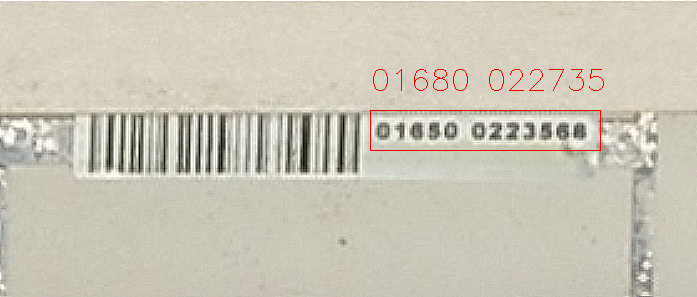

--------------------


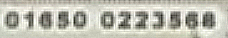

time: 91.9 ms


In [49]:
t = cv.rectangle(img2, (370, 110), (600, 150), (0,0,255), 1)
cv2_imshow(t)
print('-'*20)
roi2 = img2[111:149, 371:599]

cv2_imshow(roi2)

Here, we can use two approaches: either we can apply Pytesseract to different region of interest extracted or we can train our own classifier for it.


### Approach 1: Using Pytesseract for determining text in ROI

Image 1 Text


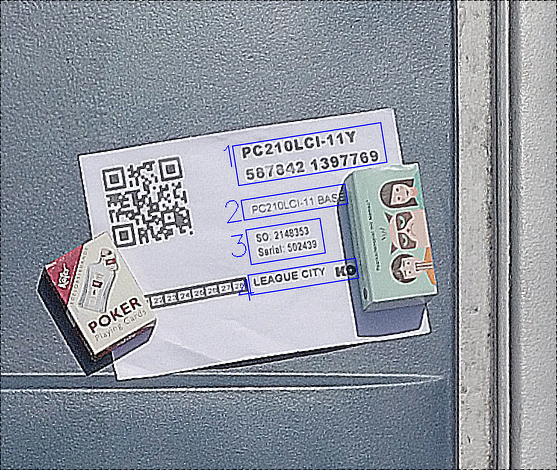

1:PC240LCI-14¥
587842 1397769
2:PC210LCi-11 Basg
3:‘80; 2148353
Sorlal $0239
4:LEAGUE CITY ug
--------------------
--------------------
Image 2 Text


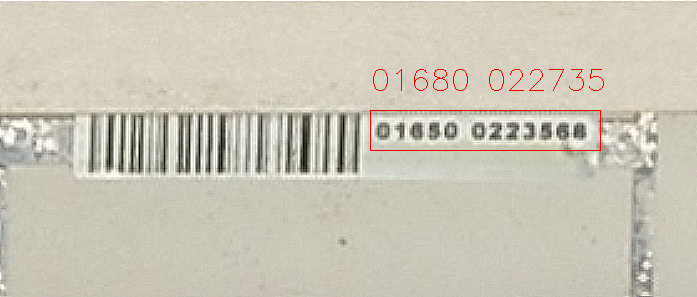

01680 022735
--------------------
time: 1.32 s


In [47]:
print('Image 1 Text')
cv2_imshow(_unrotated)

eI_1 = pytesseract.image_to_string(roi1_1)
print('1:'+ eI_1)

eI_2 = pytesseract.image_to_string(roi1_2)
print('2:'+ eI_2)

eI_3 = pytesseract.image_to_string(roi1_3)
print('3:'+ eI_3)

eI_4 = pytesseract.image_to_string(roi1_4)
print('4:'+ eI_4)

print('-'*20)
print('-'*20)

print('Image 2 Text')
cv.putText(img2, eI_21, (370, 90), cv.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 1)
cv2_imshow(img2)

eI_21 = pytesseract.image_to_string(roi2)
print(eI_21)
print('-'*20)



Now, this approach helps us recognize a lot of numbers that couldn't  be recognized earlier. We now try to train our own Network to determine the characters in the given ROIs (Region of Interests).

### Approach 2: Training a network to determine text in ROI


